In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("04-MPG.csv")
df.head()

,mpg,fuel_consumption,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,13.067477,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,15.680972,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,13.067477,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,14.700911,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,13.836152,8,302.0,140,3449,10.5,70,1,ford torino


In [19]:
#Defining X and Y
#x ba horsepower kar darim
# x = df.iloc[:,4].values.reshape(-1,1)
# y = df.iloc [:,[1]].values

#be 2 halat mishe reshape(-1,1) kard yekish hamin .reshape(-1,1) hast yeki digash inke [] ezafe konim be [:,-1] va beshe [:-[1]]

In [3]:
#dige faghat ba ye variabel kar nadarim ke horse power bood inja mikhaim ba chandta kar dashte bashim
x = df.iloc[:,2:-2].values
y = df.iloc [:,[1]].values

In [4]:
from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=y,random_state=40)
#chon dige klassifering nis o numerical hast dige stratify nemikhad
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)



In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#polynomial feautrwes

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
x_train = poly_features.fit_transform(x_train)

degree 2 alan khube. alan 3 konam miad överfit mishe kheili dige hendi mishe bad kara kharab mishe

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

# Evaluate =====

In [10]:
y_pred = model.predict(poly_features.transform(x_test))
print(y_pred)

[[ 8.43881428]
 [ 7.52016364]
 [13.16511727]
 [11.16459924]
 [11.28545466]
 [ 8.92080326]
 [ 7.80906067]
 [15.82613702]
 [13.71067474]
 [11.98360089]
 [ 7.69930674]
 [23.10040374]
 [ 7.52208407]
 [14.32748847]
 [10.38717315]
 [ 5.80970803]
 [15.50300407]
 [10.01831955]
 [ 8.50876549]
 [20.05327853]
 [17.0701512 ]
 [ 7.76940588]
 [18.51812325]
 [18.70365309]
 [ 7.13833066]
 [15.76981857]
 [13.25554881]
 [10.38415296]
 [14.98259245]
 [ 8.35804882]
 [ 7.44877051]
 [17.4632917 ]
 [ 9.18729198]
 [17.52208338]
 [15.56338328]
 [ 9.94596705]
 [ 9.30344816]
 [ 6.47927718]
 [10.94958495]
 [ 6.63826619]
 [ 8.04041944]
 [15.24632193]
 [12.38717631]
 [10.43717539]
 [ 6.60457669]
 [14.04652656]
 [17.08167736]
 [ 7.02405212]
 [ 7.83086489]
 [ 9.58766473]
 [13.83824419]
 [10.00127354]
 [12.40972811]
 [ 9.86487728]
 [ 8.23926377]
 [15.52452439]
 [ 9.07772849]
 [ 6.66535158]
 [17.97057916]
 [ 8.88356902]
 [12.33692656]
 [16.67793834]
 [17.66932012]
 [13.30053451]
 [15.79851765]
 [15.66536923]
 [ 9.30118

In [11]:
print(model.intercept_)
print(model.coef_)

[11.26646806]
[[-9.22005497e-14 -1.03681319e-01  1.17654737e+00  8.12634906e-01
   1.39371091e+00  2.79435231e-01 -1.20333614e+00  3.30058911e-01
   1.02328324e+00 -1.79766055e-01 -6.26349458e-01 -2.23060561e-01
   1.23338344e-01  2.93880420e-01 -1.91834200e+00 -1.15428641e+00
  -2.54149175e-01 -3.08517596e-01  1.03917320e+00  4.81871009e-01
   1.07743656e+00 -3.65929787e-01  6.38349344e-01 -4.38124365e-01
  -1.38666713e-01  1.32223750e-01 -2.86598191e-01 -3.39557989e-01]]


# ==== Evaluation ====

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score


In [13]:
mae = mean_absolute_error(y_test,y_pred)
print(f"MAE: {mae}")
mse = mean_squared_error(y_test,y_pred)
print(f"MSE: {mse}")
#rmse
print(f"RMSE: {np.sqrt(mse)}")
mape = mean_absolute_percentage_error(y_test,y_pred)
print(f"MAPE: {mape}")
r2 = r2_score(y_test,y_pred)
print(f"r2: {r2}")

MAE: 1.0209058714864785
MSE: 1.8136436404708198
RMSE: 1.346715872213148
MAPE: 0.09001236007139117
r2: 0.8875022751932763


# ===== Visualisation ======

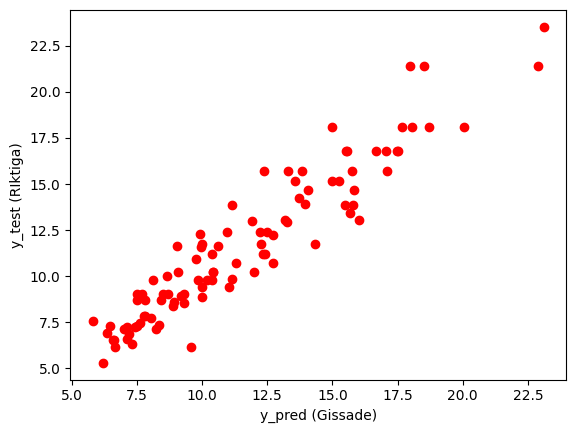

In [14]:
plt.scatter(y_pred,y_test,color="red")
plt.xlabel("y_pred (Gissade)")
plt.ylabel("y_test (RIktiga)")
plt.show()
#y_pred,y_test mishe tu mehvare ofoghi x biad y_pred vezare tu mehvare amudi y biad y_test bezare

be nesbat be ghabli ke faghat ye moteghayer dasht inja mibinim ke nemoodar kheili fit tar va behtar shod